In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import datetime as dt

#mydateparser = lambda x: pd.datetime.strptime(x, "%Y -%m -%d")
bitc_csv = read_csv("C:\\Users\\tsada\\Downloads\\BTC-USD.csv",parse_dates=True)

#bitc_csv['Date'] = pd.to_datetime(bitc_csv['Date'],format='%Y-%m-%d')
bitc_csv['Date'] = pd.to_datetime(bitc_csv['Date'])



# Data Visualization 

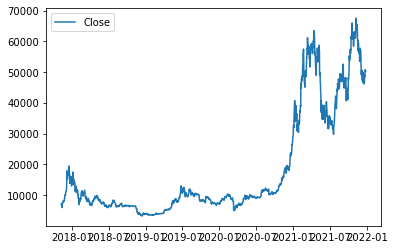

In [2]:
y= bitc_csv[['Close']]
x=bitc_csv[['Date']]

plt.plot(x,y,label='Close')

plt.legend()
plt.show()

## Preparing Close and Date Columns


In [3]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df =bitc_csv.copy(deep=True)
df[['Close']]=scaler.fit_transform(bitc_csv[['Close']])
df['Date']=df['Date'].map(dt.datetime.toordinal)

#  Linear Regression

In [4]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
y= np.array(df['Close']).reshape(-1, 1)
x= np.array(df['Date']).reshape(-1, 1)
regr = linear_model.LinearRegression()
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.20)
model=regr.fit(x_train, y_train)
pred= regr.predict(x_test)


score= regr.score( x_test, y_test)
print('Score:' ,score)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


y_train=scaler.inverse_transform(y_train)
y_test=scaler.inverse_transform(y_test)
pred= scaler.inverse_transform(pred)

Score: 0.5321558829779713
Mean Absolute Error: 0.15154724120868804
Mean Squared Error: 0.03374827630956271
Root Mean Squared Error: 0.18370703935767596


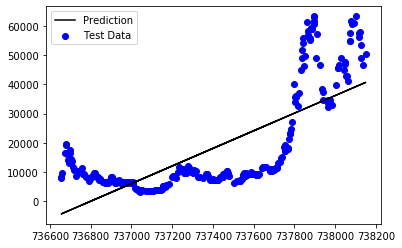

In [5]:
plt.scatter(x_test, y_test, color ='b', label='Test Data')
plt.plot(x_test, pred, color ='k',label='Prediction')

plt.legend()
plt.show()

In [6]:
score= regr.score( x_test, y_test)
print('Score:' ,score)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Score: -1.0230816484346872
Mean Absolute Error: 9749.044090601003
Mean Squared Error: 139662430.48111054
Root Mean Squared Error: 11817.886041128952


# Logistic Regression

Score: 0.890728476821192
Mean Absolute Error: 17540.192971662836
Mean Squared Error: 458207048.79356545
Root Mean Squared Error: 21405.771389827685


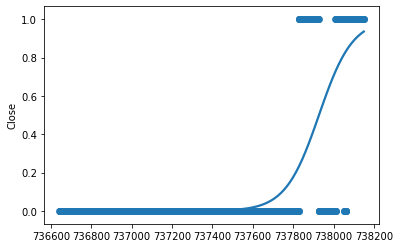

In [7]:
from sklearn.linear_model import LogisticRegression
import math

x= np.array(df['Date']).reshape(-1, 1)
y= df['Close'].apply(lambda x: 1 / (1 + math.exp(-x)))
y= y.apply(lambda x: 1 if x>0.655 else 0 )


x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.20)

logreg = LogisticRegression(solver='lbfgs')

logreg.fit(x_train,y_train)

# # #
# y_pred=logreg.predict(x_test)

score= logreg.score( x_test, y_test)
print('Score:',score)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))



import seaborn as sns
sns.regplot(x=x, y=y , data=df, logistic=True, ci=None)



In [8]:
import tensorflow as tf
from tensorflow.keras.layers import *

df1 =bitc_csv.copy(deep=True)


C:\Users\tsada\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\tsada\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\tsada\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\tsada\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\f

# Neural Network 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/110
 - 1s - loss: 0.0201
Epoch 2/110
 - 0s - loss: 0.0152
Epoch 3/110
 - 0s - loss: 0.0126
Epoch 4/110
 - 0s - loss: 0.0115
Epoch 5/110
 - 0s - loss: 0.0109
Epoch 6/110
 - 0s - loss: 0.0106
Epoch 7/110
 - 0s - loss: 0.0102
Epoch 8/110
 - 0s - loss: 0.0098
Epoch 9/110
 - 0s - loss: 0.0093
Epoch 10/110
 - 0s - loss: 0.0088
Epoch 11/110
 - 0s - loss: 0.0083
Epoch 12/110
 - 0s - loss: 0.0077
Epoch 13/110
 - 0s - loss: 0.0071
Epoch 14/110
 - 0s - loss: 0.0065
Epoch 15/110
 - 0s - loss: 0.0059
Epoch 16/110
 - 0s - loss: 0.0054
Epoch 17/110
 - 0s - loss: 0.0049
Epoch 18/110
 - 0s - loss: 0.0043
Epoch 19/110
 - 0s - loss: 0.0038
Epoch 20/110
 - 0s - loss: 0.0033
Epoch 21/110
 - 0s - loss: 0.0028
Epoch 22/110
 - 0s - loss: 0.0024
Epoch 23/110
 - 0s - loss: 0.0020
Epoch 24/110
 - 0s - loss: 0.0016
Epoch 25/110
 - 0s - loss

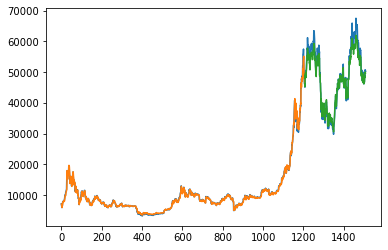

In [9]:
    import numpy as np
    import matplotlib.pyplot as plt
    from pandas import read_csv
    from tensorflow.keras.models import Sequential, load_model
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    import math
    import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
    
    
    
    # convert an array of values into a dataset matrix
    def create_dataset(dataset):
      dataX, dataY = [], []
      for i in range(len(dataset)-1):
        dataX.append(dataset[i])
        dataY.append(dataset[i + 1])
      return np.asarray(dataX), np.asarray(dataY)


     


    df1 = df1.drop(['Date','Open','High','Low','Volume','Adj Close'], axis=1)
    dataset = df1.values
    dataset = dataset.astype('float32')
    
    
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    
    
    #prepare the X and Y label
    X,y = create_dataset(dataset)
    
    
   
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.20, shuffle=False)
    
    
    # reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(2, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=110, batch_size=50, verbose=2)
   
   
    
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
   
    futurePredict = model.predict(np.asarray([[testPredict[-1]]]))
    futurePredict = scaler.inverse_transform(futurePredict)
    
    
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform(trainY)
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform(testY)
   
    print("Bitcoin price for tomorrow: ", futurePredict)
    
    
    
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    
    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[1:len(trainPredict)+1, :] = trainPredict
    
    
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict):len(dataset)-1, :] = testPredict
    
    
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()